In [1]:
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data processing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn

# modeling
from sklearn.cluster import KMeans

### Create function

In [2]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=20,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.xticks([0,1,2,3,4,5,6,7,8,9,10])
    plt.show()

In [3]:
def kmean(number_of_clusters, dataframe):
    km = KMeans(n_clusters=number_of_clusters, n_init=20,random_state=0)
    return km.fit_predict(dataframe)

# 1.Segmentation by Product aisle preference

### load data: dataset of 134 features

In [4]:
df= pd.read_csv('df_aisle.csv')
df.head()

,Unnamed: 0,user_id,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,1,2,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,...,3.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,42.0
2,2,5,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,3,7,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4,4,8,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_aisle=df.iloc[:,2:] # drop user ID

In [6]:
df_aisle.head()

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,3.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,42.0
2,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### identify top aisle by number of products ordered: reduce number of features to 67

In [7]:
# identify top aisle by number of products ordered
total_order= df_aisle.sum().sort_values(ascending=False).reset_index()
total_order.columns=['aisle','total']
total_order

,aisle,total
0,fresh fruits,2467078.0
1,fresh vegetables,2332313.0
2,packaged vegetables fruits,1201242.0
3,yogurt,985207.0
4,packaged cheese,666513.0
...,...,...
129,eye ear care,6308.0
130,baby bath body care,5724.0
131,baby accessories,5530.0
132,beauty,4281.0


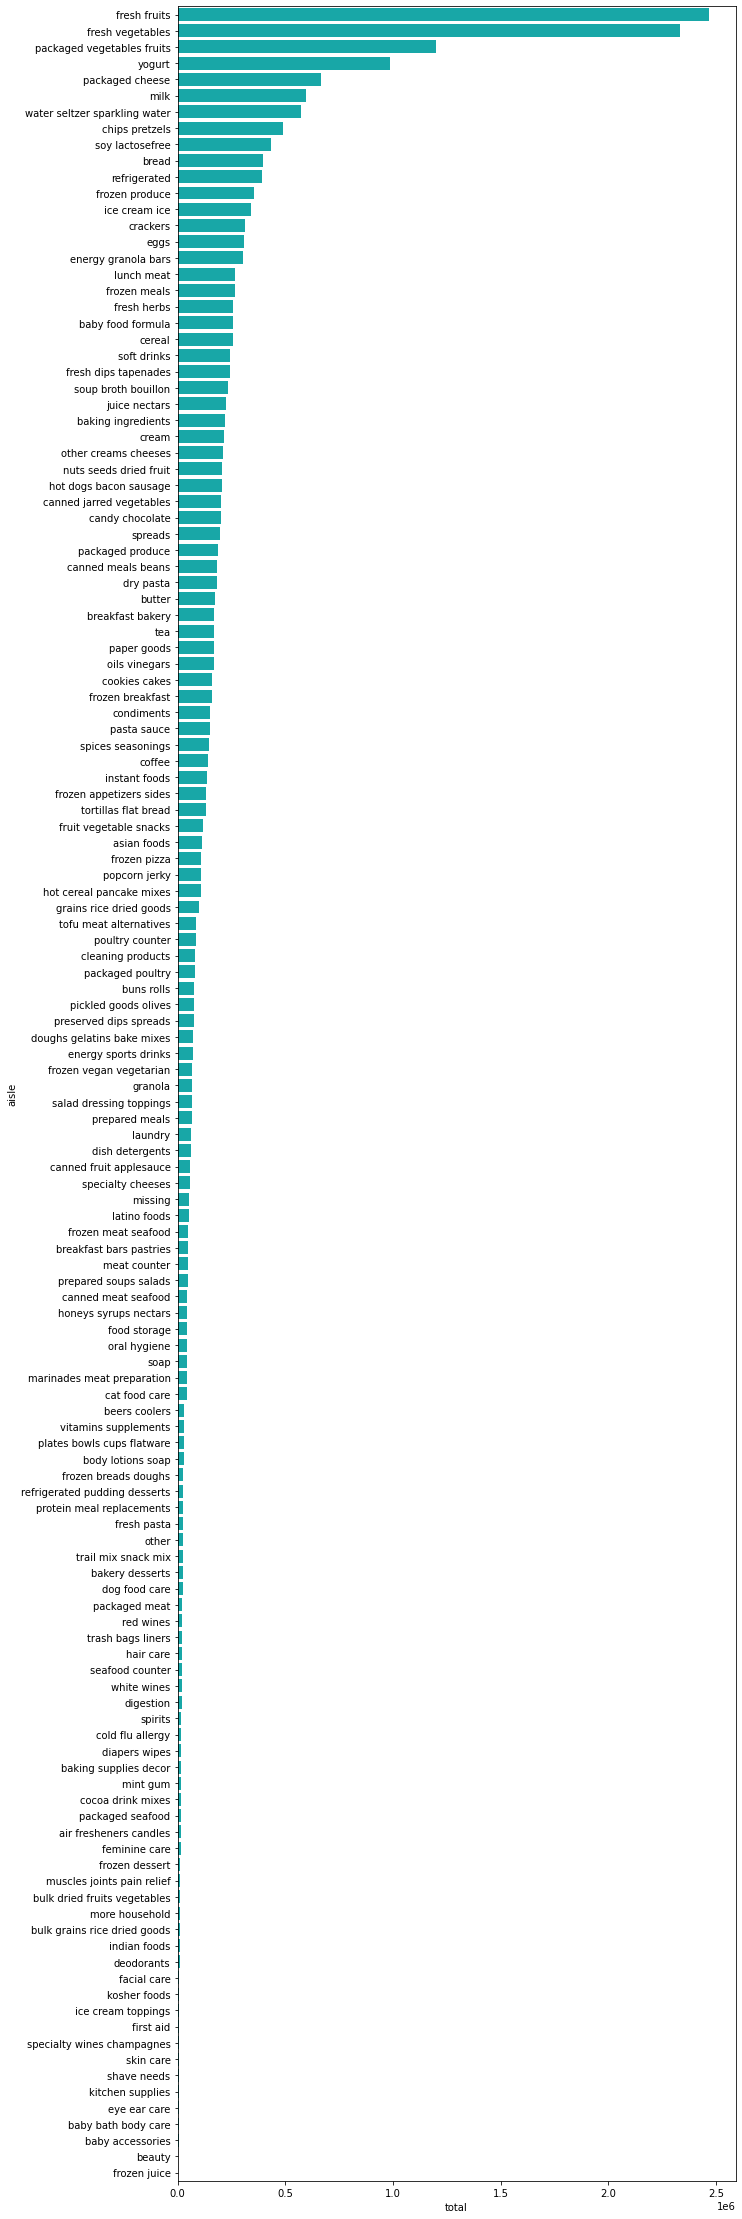

In [8]:
plt.figure(figsize=(10,40))
sns.barplot(data=total_order,y='aisle', x='total',color='c');

In [9]:
# extract list of top 50% aisle 
top_aisle= total_order[total_order.total>= total_order.total.median()].aisle.to_list() 
print(top_aisle)
print(len(top_aisle))

['fresh fruits', 'fresh vegetables', 'packaged vegetables fruits', 'yogurt', 'packaged cheese', 'milk', 'water seltzer sparkling water', 'chips pretzels', 'soy lactosefree', 'bread', 'refrigerated', 'frozen produce', 'ice cream ice', 'crackers', 'eggs', 'energy granola bars', 'lunch meat', 'frozen meals', 'fresh herbs', 'baby food formula', 'cereal', 'soft drinks', 'fresh dips tapenades', 'soup broth bouillon', 'juice nectars', 'baking ingredients', 'cream', 'other creams cheeses', 'nuts seeds dried fruit', 'hot dogs bacon sausage', 'canned jarred vegetables', 'candy chocolate', 'spreads', 'packaged produce', 'canned meals beans', 'dry pasta', 'butter', 'breakfast bakery', 'tea', 'paper goods', 'oils vinegars', 'cookies cakes', 'frozen breakfast', 'condiments', 'pasta sauce', 'spices seasonings', 'coffee', 'instant foods', 'frozen appetizers sides', 'tortillas flat bread', 'fruit vegetable snacks', 'asian foods', 'frozen pizza', 'popcorn jerky', 'hot cereal pancake mixes', 'grains rice

### perform dimensionality reduction
- Reduce the number of features to 10 feature using PCA while remaining 80% variance of the original dataset

In [10]:
# reduce dataset with 67 features into dataset with 10 features
pca= sklearn.decomposition.PCA(10)

In [12]:
pca_result= pca.fit_transform(df_aisle[top_aisle])

In [13]:
# new dataset with 10 PC explain 80% variance in the original dataset
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[0.48613328 0.10187238 0.05635709 0.0378259  0.03016294 0.02488493
 0.01962381 0.01882363 0.01563945 0.0138122 ]
0.805135614452511


In [14]:
df_top_aisle = pd.DataFrame(data = pca_result, columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10'])

In [15]:
df_top_aisle

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,-25.519456,3.318318,-1.864284,-0.173316,0.562728,-1.980098,1.999462,-4.096637,-2.478721,-1.651070
1,9.711323,40.179772,3.468178,13.194693,-7.309627,-2.121957,7.878521,2.748534,-9.879289,-13.088746
2,-19.899431,-2.885750,0.682380,3.824370,0.706825,-1.874809,-5.072113,2.914286,0.961225,3.168506
3,5.348474,5.608706,-6.631685,-5.358397,-1.985165,-8.429254,7.061095,15.612320,22.295769,-3.135720
4,-10.077306,-20.256490,9.269641,2.705441,-0.972034,2.797017,2.351016,-0.332648,-0.471860,0.766520
...,...,...,...,...,...,...,...,...,...,...
131204,6.114350,34.163155,32.614346,-6.066414,3.140873,-9.493699,7.865830,-8.223487,-11.432240,-8.711851
131205,48.330885,-10.322317,-19.166463,-0.120792,-7.681922,1.136932,-11.125949,9.299374,-2.358573,-5.664563
131206,-7.829720,-10.328905,2.958653,-2.738717,-2.968560,3.027778,6.899991,0.365554,-1.824216,5.105156
131207,-21.118706,5.476410,1.137005,7.151319,-0.209417,-0.126295,-0.959493,-1.864129,0.751038,1.414361


### choose an optimal number of cluster
- Sum of squared errors (SSE) is the sum of the "errors" : the difference between a data point and the centroid of its assigned cluster, for all data points, squared
- The tighter the clusters, the closer the constituent points to their respective clusters, and the lower the SSE/inertia
- When SSE/inertia is plotted at different numbers of clusters, there often is an elbow in the plot, where the gain in terms of reduced errors seems to slow down for each new cluster

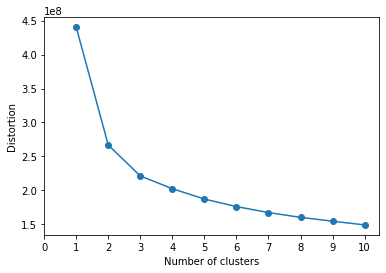

In [16]:
#The Elbow Method with Sum of Squared Errors (Inertia Plot)
plot_distortion(df_top_aisle,max_clusters = 10)

### run kmean clustering with 4 segments

In [17]:
df_top_aisle['Kcluster_aisle']= kmean(4, df_top_aisle)

In [18]:
# quantify the size of each segment
df_top_aisle['Kcluster_aisle'].value_counts(normalize=True)

0    0.708404
1    0.204224
3    0.069264
2    0.018109
Name: Kcluster_aisle, dtype: float64

In [19]:
df_top_aisle['Kcluster_aisle'].value_counts()

0    92949
1    26796
3     9088
2     2376
Name: Kcluster_aisle, dtype: int64

### visualize the 4 segments on the first 2 PC (explain 60% of original dataset)

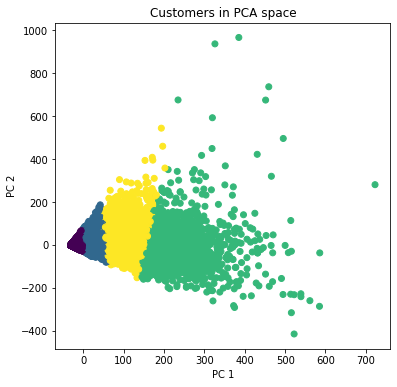

In [20]:
fig = plt.figure(figsize=(6,6))
plt.scatter(df_top_aisle['pc1'],df_top_aisle['pc2'], marker='o', c=df_top_aisle['Kcluster_aisle'])
plt.title('Customers in PCA space')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

### quickly explore the differences between 4 segments
- The only differences between segments is total number of products purchased per user: users who order many products vs. users who order less products 
- The model fails to record the ailse preference of each segment: The top 5 popular aisles remain similar across 4 segments (fresh fruits, fresh vegetables...) --> the result is not interpretable

In [21]:
df['Kcluster_aisle']= df_top_aisle['Kcluster_aisle']

In [22]:
df.drop(['Unnamed: 0','user_id'],axis=1).groupby('Kcluster_aisle').mean().T.sort_values(0,ascending=False).head()

Kcluster_aisle,0,1,2,3
fresh fruits,6.443060,29.899575,156.367424,76.527729
fresh vegetables,5.810843,29.897373,155.383418,68.428697
packaged vegetables fruits,3.487052,15.054560,66.984848,34.613336
yogurt,2.879138,11.833259,52.351010,30.383363
water seltzer sparkling water,2.534196,6.669727,16.395202,13.174186


In [23]:
df.drop(['Unnamed: 0','user_id'],axis=1).groupby('Kcluster_aisle').mean().T.sort_values(1,ascending=False).head()

Kcluster_aisle,0,1,2,3
fresh fruits,6.443060,29.899575,156.367424,76.527729
fresh vegetables,5.810843,29.897373,155.383418,68.428697
packaged vegetables fruits,3.487052,15.054560,66.984848,34.613336
yogurt,2.879138,11.833259,52.351010,30.383363
packaged cheese,2.277658,8.088297,31.858586,17.867188


In [24]:
df.drop(['Unnamed: 0','user_id'],axis=1).groupby('Kcluster_aisle').mean().T.sort_values(2,ascending=False).head()

Kcluster_aisle,0,1,2,3
fresh fruits,6.443060,29.899575,156.367424,76.527729
fresh vegetables,5.810843,29.897373,155.383418,68.428697
packaged vegetables fruits,3.487052,15.054560,66.984848,34.613336
yogurt,2.879138,11.833259,52.351010,30.383363
packaged cheese,2.277658,8.088297,31.858586,17.867188


In [25]:
df.drop(['Unnamed: 0','user_id'],axis=1).groupby('Kcluster_aisle').mean().T.sort_values(3,ascending=False).head()

Kcluster_aisle,0,1,2,3
fresh fruits,6.443060,29.899575,156.367424,76.527729
fresh vegetables,5.810843,29.897373,155.383418,68.428697
packaged vegetables fruits,3.487052,15.054560,66.984848,34.613336
yogurt,2.879138,11.833259,52.351010,30.383363
packaged cheese,2.277658,8.088297,31.858586,17.867188


In [26]:
df.drop(['Unnamed: 0','user_id'],axis=1).groupby('Kcluster_aisle').mean().T.sum()

Kcluster_aisle
0      78.257636
1     266.372481
2    1019.140152
3     571.461818
dtype: float64

In [27]:
#df.to_csv('df_ailse_result.csv')

--------------------

## Segmentation using normalized data 

### load and process data
- instead of obtaining absolute number of products ordered per aisle, we will now look at ratio of products ordered iout of total 
- this will help us to ignore the basket size of each user (eliminate the impact of basket size on final result) and force our model to segment customers based on their prefered aisle (aisle with high % contribution to total)

In [28]:
df3= pd.read_csv('df_aisle.csv')
df3.head()

,Unnamed: 0,user_id,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
1,1,2,0.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0,...,3.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,42.0
2,2,5,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,3,7,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
4,4,8,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
df3.drop('Unnamed: 0',axis=1, inplace= True)

In [30]:
# calculate total products ordered by user
df3['total']= df3.iloc[:,1:].sum(axis=1)

In [31]:
# create a new data set
df_aisle_normalize= df3[['user_id']]

In [32]:
aisle_list= df3.iloc[:,1:-1].columns.to_list()

In [33]:
# calculate % of products order in each aisle out of total for each user: 
for aisle in aisle_list:
    df_aisle_normalize[aisle]=df3[aisle]/df3['total']*100    

<ipython-input-33-15cce9513655>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aisle_normalize[aisle]=df3[aisle]/df3['total']*100
<ipython-input-33-15cce9513655>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_aisle_normalize[aisle]=df3[aisle]/df3['total']*100


In [34]:
df_aisle_normalize.head()

,user_id,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,1.428571,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,2.857143
1,2,0.000000,1.327434,0.0,0.0,0.0,0.0,0.884956,0.0,0.0,...,1.327434,0.442478,0.442478,0.000000,0.0,0.0,0.0,0.884956,0.0,18.584071
2,5,2.173913,8.695652,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,6.521739
3,7,0.000000,0.000000,0.0,0.0,0.0,0.0,1.395349,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,2.325581
4,8,0.000000,1.492537,0.0,0.0,0.0,0.0,1.492537,0.0,0.0,...,0.000000,0.000000,1.492537,1.492537,0.0,0.0,0.0,0.000000,0.0,0.000000


### perform dimensionality reduction

In [35]:
pca_n= sklearn.decomposition.PCA(10)

In [36]:
pca_n_result= pca_n.fit_transform(df_aisle_normalize[top_aisle])

In [37]:
pca_n.explained_variance_ratio_

array([0.1617469 , 0.11107412, 0.0790656 , 0.05807788, 0.0447066 ,
       0.03620015, 0.0331081 , 0.03050981, 0.02282064, 0.02223744])

In [38]:
df_top_aisle_n = pd.DataFrame(data = pca_n_result, columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10'])
df_top_aisle_n.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,-12.338357,2.844257,-4.927817,1.474829,-7.883153,-12.304321,-8.992178,8.339559,-5.929071,-3.946032
1,-3.481602,11.087654,-6.455888,-11.025321,7.173013,-2.930540,-4.984619,-5.909870,-1.822438,1.175314
2,8.894172,-3.096389,-2.187523,-1.184682,4.240553,10.102761,-2.025485,11.086732,0.258361,4.586451
3,-0.249992,2.328461,-3.578020,-1.147558,-2.417491,4.340262,0.059278,-0.787417,10.540703,-4.496527
4,22.921519,-25.820817,5.447901,5.046569,0.239935,-4.564624,0.679572,-2.059223,-0.822267,-1.066327


### choose an optimal number of cluster

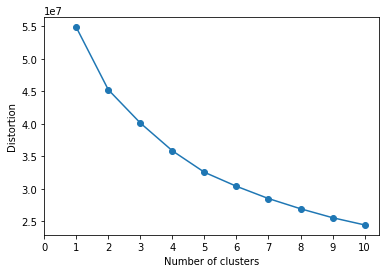

In [39]:
plot_distortion(df_top_aisle_n,max_clusters = 10)

### run kmean clustering with 4 segments

In [40]:
df_top_aisle_n['Kcluster_aisle_n']= kmean(4, df_top_aisle_n)

In [41]:
df_top_aisle_n['Kcluster_aisle_n'].value_counts()

0    67098
3    41320
2    19149
1     3642
Name: Kcluster_aisle_n, dtype: int64

### quickly explore the differences between 4 segments
- After ignoring the basket size for each aisle, we can see that there is a difference between segments in regarding to aisle preference

In [42]:
df_aisle_normalize['Kcluster_aisle_n']= df_top_aisle_n['Kcluster_aisle_n']

In [43]:
df_aisle_normalize.head()

,user_id,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,Kcluster_aisle_n
0,1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,2.857143,0
1,2,0.000000,1.327434,0.0,0.0,0.0,0.0,0.884956,0.0,0.0,...,0.442478,0.442478,0.000000,0.0,0.0,0.0,0.884956,0.0,18.584071,0
2,5,2.173913,8.695652,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,6.521739,3
3,7,0.000000,0.000000,0.0,0.0,0.0,0.0,1.395349,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,2.325581,0
4,8,0.000000,1.492537,0.0,0.0,0.0,0.0,1.492537,0.0,0.0,...,0.000000,1.492537,1.492537,0.0,0.0,0.0,0.000000,0.0,0.000000,3


In [44]:
df_aisle_normalize.drop('user_id',axis=1).groupby('Kcluster_aisle_n').mean().T.sort_values(1, ascending=False)
# value: percent contribution of a specific aisle into total product purchased

Kcluster_aisle_n,0,1,2,3
water seltzer sparkling water,2.666849,37.371647,2.297591,1.753530
soft drinks,2.301618,5.245966,0.869367,0.460729
fresh fruits,5.891216,4.290594,24.578174,11.973671
packaged produce,0.942944,2.078981,7.095718,0.523088
packaged vegetables fruits,3.790672,1.910413,7.087883,6.778369
...,...,...,...,...
frozen juice,0.024414,0.017078,0.018742,0.006635
beauty,0.034976,0.016982,0.008993,0.013318
packaged seafood,0.058337,0.014135,0.050562,0.077854
baby bath body care,0.033032,0.008658,0.013901,0.015203


In [45]:
#df_aisle_normalize.to_csv('df_aisle_normalize_result.csv')

--------------------

# 2.Segmentation by User behavior

### load data

In [46]:
df2= pd.read_csv('df_users.csv')
df2.head()

,Unnamed: 0,user_id,nbr_order,mean_days_bt_order,nbr_order_weekends,nbr_order_weekday,percent_order_weekends,nbr_order_offpeak,nbr_order_peak,nbr_order_unusual,percent_order_offpeak,percent_order_peak,percent_order_unnusual,basket_size,reordered_ratio,nbr_unique_product_ordered,nbr_unique_aisle_ordered,ratio_aisle_ordered
0,0,1,11,19.00,8.0,3.0,72.73,6.0,5.0,0.0,54.55,45.45,0.0,6.363636,72.431129,19,13,10.0
1,1,2,15,16.29,9.0,6.0,60.00,0.0,15.0,0.0,0.00,100.00,0.0,15.066667,44.390335,121,37,28.0
2,2,5,5,11.50,2.0,3.0,40.00,2.0,3.0,0.0,40.00,60.00,0.0,9.200000,39.111111,28,17,13.0
3,3,7,21,10.45,10.0,11.0,47.62,6.0,15.0,0.0,28.57,71.43,0.0,10.238095,76.066630,69,34,25.0
4,4,8,4,23.33,2.0,2.0,50.00,1.0,1.0,2.0,25.00,25.00,50.0,16.750000,28.504274,50,19,14.0


In [47]:
df_user= df2.drop(['Unnamed: 0','user_id'],axis=1)
df_user.head()

,nbr_order,mean_days_bt_order,nbr_order_weekends,nbr_order_weekday,percent_order_weekends,nbr_order_offpeak,nbr_order_peak,nbr_order_unusual,percent_order_offpeak,percent_order_peak,percent_order_unnusual,basket_size,reordered_ratio,nbr_unique_product_ordered,nbr_unique_aisle_ordered,ratio_aisle_ordered
0,11,19.00,8.0,3.0,72.73,6.0,5.0,0.0,54.55,45.45,0.0,6.363636,72.431129,19,13,10.0
1,15,16.29,9.0,6.0,60.00,0.0,15.0,0.0,0.00,100.00,0.0,15.066667,44.390335,121,37,28.0
2,5,11.50,2.0,3.0,40.00,2.0,3.0,0.0,40.00,60.00,0.0,9.200000,39.111111,28,17,13.0
3,21,10.45,10.0,11.0,47.62,6.0,15.0,0.0,28.57,71.43,0.0,10.238095,76.066630,69,34,25.0
4,4,23.33,2.0,2.0,50.00,1.0,1.0,2.0,25.00,25.00,50.0,16.750000,28.504274,50,19,14.0


### check correlation between features

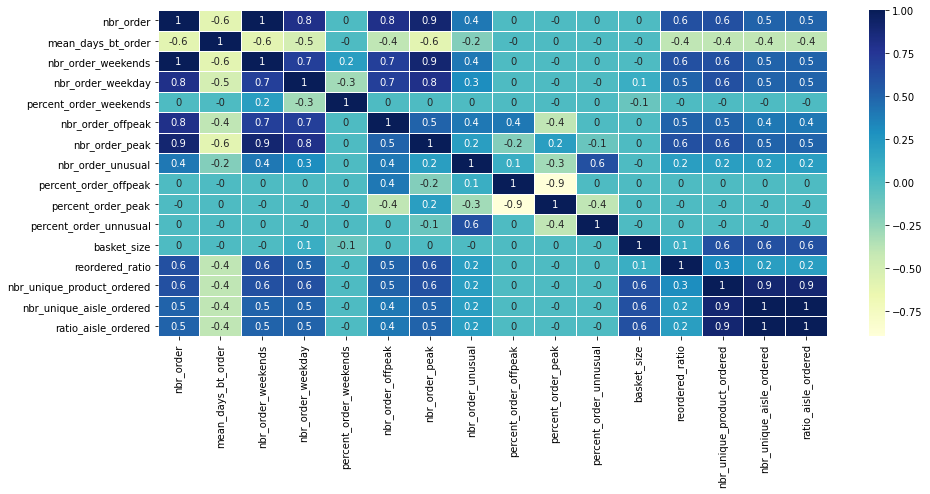

In [48]:
plt.figure(figsize=(15,6))
sns.heatmap(df_user.corr().round(1),
            linewidths=0.5,cbar=True,cmap='YlGnBu',annot=True)
plt.xticks(rotation=90)
plt.show()

In [49]:
df_user.columns

Index(['nbr_order', 'mean_days_bt_order', 'nbr_order_weekends',
       'nbr_order_weekday', 'percent_order_weekends', 'nbr_order_offpeak',
       'nbr_order_peak', 'nbr_order_unusual', 'percent_order_offpeak',
       'percent_order_peak', 'percent_order_unnusual', 'basket_size',
       'reordered_ratio', 'nbr_unique_product_ordered',
       'nbr_unique_aisle_ordered', 'ratio_aisle_ordered'],
      dtype='object')

In [50]:
# drop several features with high correlation with other
df_user.drop(['nbr_unique_aisle_ordered', 'ratio_aisle_ordered','percent_order_offpeak'],axis= 1, inplace= True)

### choose an optimal number of cluster

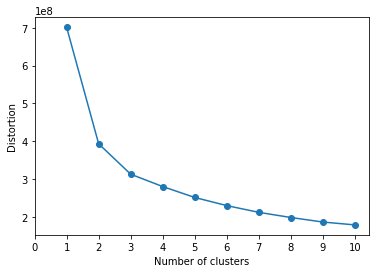

In [51]:
plot_distortion(df_user,max_clusters = 10)

In [52]:
df_user['Kcluster_user']= kmean(4, df_user)

In [53]:
df_user['Kcluster_user'].value_counts()

1    65718
2    41074
0    18841
3     5576
Name: Kcluster_user, dtype: int64

In [54]:
df2['Kcluster_user']=df_user['Kcluster_user']

In [55]:
#df2.to_csv('df_users_result.csv')

---------------------

# 3.Segmentation by User behavior & Product aisle preference

### Load data

In [56]:
# dataset of aisle preference (after Dimensionality reduction)
print(df_top_aisle_n.shape)
df_top_aisle_n.head()

(131209, 11)


,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,Kcluster_aisle_n
0,-12.338357,2.844257,-4.927817,1.474829,-7.883153,-12.304321,-8.992178,8.339559,-5.929071,-3.946032,0
1,-3.481602,11.087654,-6.455888,-11.025321,7.173013,-2.930540,-4.984619,-5.909870,-1.822438,1.175314,0
2,8.894172,-3.096389,-2.187523,-1.184682,4.240553,10.102761,-2.025485,11.086732,0.258361,4.586451,3
3,-0.249992,2.328461,-3.578020,-1.147558,-2.417491,4.340262,0.059278,-0.787417,10.540703,-4.496527,0
4,22.921519,-25.820817,5.447901,5.046569,0.239935,-4.564624,0.679572,-2.059223,-0.822267,-1.066327,3


In [57]:
# add user id 
df_top_aisle_n['user_id']= pd.read_csv('df_aisle.csv')[['user_id']]

In [58]:
# dataset of user behavior
print(df_user.shape)
df_user.head()

(131209, 14)


,nbr_order,mean_days_bt_order,nbr_order_weekends,nbr_order_weekday,percent_order_weekends,nbr_order_offpeak,nbr_order_peak,nbr_order_unusual,percent_order_peak,percent_order_unnusual,basket_size,reordered_ratio,nbr_unique_product_ordered,Kcluster_user
0,11,19.00,8.0,3.0,72.73,6.0,5.0,0.0,45.45,0.0,6.363636,72.431129,19,1
1,15,16.29,9.0,6.0,60.00,0.0,15.0,0.0,100.00,0.0,15.066667,44.390335,121,0
2,5,11.50,2.0,3.0,40.00,2.0,3.0,0.0,60.00,0.0,9.200000,39.111111,28,1
3,21,10.45,10.0,11.0,47.62,6.0,15.0,0.0,71.43,0.0,10.238095,76.066630,69,2
4,4,23.33,2.0,2.0,50.00,1.0,1.0,2.0,25.00,50.0,16.750000,28.504274,50,1


In [59]:
# add user id
df_user['user_id']= pd.read_csv('df_users.csv')[['user_id']]

In [60]:
# combine the 2 dataset using userID
df_combine= df_top_aisle_n.merge(df_user,how= 'inner')

In [61]:
df_combine.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,percent_order_weekends,nbr_order_offpeak,nbr_order_peak,nbr_order_unusual,percent_order_peak,percent_order_unnusual,basket_size,reordered_ratio,nbr_unique_product_ordered,Kcluster_user
0,-12.338357,2.844257,-4.927817,1.474829,-7.883153,-12.304321,-8.992178,8.339559,-5.929071,-3.946032,...,72.73,6.0,5.0,0.0,45.45,0.0,6.363636,72.431129,19,1
1,-3.481602,11.087654,-6.455888,-11.025321,7.173013,-2.930540,-4.984619,-5.909870,-1.822438,1.175314,...,60.00,0.0,15.0,0.0,100.00,0.0,15.066667,44.390335,121,0
2,8.894172,-3.096389,-2.187523,-1.184682,4.240553,10.102761,-2.025485,11.086732,0.258361,4.586451,...,40.00,2.0,3.0,0.0,60.00,0.0,9.200000,39.111111,28,1
3,-0.249992,2.328461,-3.578020,-1.147558,-2.417491,4.340262,0.059278,-0.787417,10.540703,-4.496527,...,47.62,6.0,15.0,0.0,71.43,0.0,10.238095,76.066630,69,2
4,22.921519,-25.820817,5.447901,5.046569,0.239935,-4.564624,0.679572,-2.059223,-0.822267,-1.066327,...,50.00,1.0,1.0,2.0,25.00,50.0,16.750000,28.504274,50,1


In [62]:
df_combine.columns

Index(['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10',
       'Kcluster_aisle_n', 'user_id', 'nbr_order', 'mean_days_bt_order',
       'nbr_order_weekends', 'nbr_order_weekday', 'percent_order_weekends',
       'nbr_order_offpeak', 'nbr_order_peak', 'nbr_order_unusual',
       'percent_order_peak', 'percent_order_unnusual', 'basket_size',
       'reordered_ratio', 'nbr_unique_product_ordered', 'Kcluster_user'],
      dtype='object')

In [63]:
# features to be used in model
features=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10',
       'nbr_order', 'mean_days_bt_order',
       'nbr_order_weekends', 'nbr_order_weekday', 'percent_order_weekends',
       'nbr_order_offpeak', 'nbr_order_peak', 'nbr_order_unusual',
       'percent_order_peak', 'percent_order_unnusual', 'basket_size',
       'reordered_ratio', 'nbr_unique_product_ordered']

### choose an optimal number of cluster

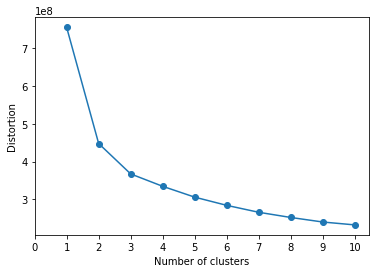

In [64]:
plot_distortion(df_combine[features],max_clusters = 10)

In [65]:
df_combine['Kcluster-combine']= kmean(4, df_combine[features])

In [66]:
df_combine['Kcluster-combine'].value_counts()

3    65316
1    41404
2    18919
0     5570
Name: Kcluster-combine, dtype: int64

### Combine and export data

In [67]:
df_combine[['user_id','Kcluster-combine']]

,user_id,Kcluster-combine
0,1,3
1,2,2
2,5,3
3,7,1
4,8,3
...,...,...
131204,206199,2
131205,206200,1
131206,206203,1
131207,206205,3


In [68]:
df_aisle_normalize

,user_id,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,Kcluster_aisle_n
0,1,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,2.857143,0
1,2,0.000000,1.327434,0.000000,0.0,0.000000,0.0,0.884956,0.0,0.0,...,0.442478,0.442478,0.000000,0.0,0.000000,0.0,0.884956,0.0,18.584071,0
2,5,2.173913,8.695652,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,6.521739,3
3,7,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.395349,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,2.325581,0
4,8,0.000000,1.492537,0.000000,0.0,0.000000,0.0,1.492537,0.0,0.0,...,0.000000,1.492537,1.492537,0.0,0.000000,0.0,0.000000,0.0,0.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131204,206199,0.000000,0.000000,0.000000,0.0,0.859599,0.0,0.573066,0.0,0.0,...,0.000000,0.000000,0.286533,0.0,0.000000,0.0,1.719198,0.0,14.040115,0
131205,206200,0.000000,0.000000,0.000000,0.0,0.000000,0.0,2.013423,0.0,0.0,...,0.335570,0.000000,0.000000,0.0,0.000000,0.0,3.691275,0.0,0.671141,3
131206,206203,0.000000,0.000000,0.000000,0.0,0.000000,0.0,2.272727,0.0,0.0,...,14.393939,0.000000,1.515152,0.0,0.000000,0.0,2.272727,0.0,0.000000,3
131207,206205,0.000000,0.000000,1.960784,0.0,0.000000,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,17.647059,2


In [69]:
df2

,Unnamed: 0,user_id,nbr_order,mean_days_bt_order,nbr_order_weekends,nbr_order_weekday,percent_order_weekends,nbr_order_offpeak,nbr_order_peak,nbr_order_unusual,percent_order_offpeak,percent_order_peak,percent_order_unnusual,basket_size,reordered_ratio,nbr_unique_product_ordered,nbr_unique_aisle_ordered,ratio_aisle_ordered,Kcluster_user
0,0,1,11,19.00,8.0,3.0,72.73,6.0,5.0,0.0,54.55,45.45,0.00,6.363636,72.431129,19,13,10.0,1
1,1,2,15,16.29,9.0,6.0,60.00,0.0,15.0,0.0,0.00,100.00,0.00,15.066667,44.390335,121,37,28.0,0
2,2,5,5,11.50,2.0,3.0,40.00,2.0,3.0,0.0,40.00,60.00,0.00,9.200000,39.111111,28,17,13.0,1
3,3,7,21,10.45,10.0,11.0,47.62,6.0,15.0,0.0,28.57,71.43,0.00,10.238095,76.066630,69,34,25.0,2
4,4,8,4,23.33,2.0,2.0,50.00,1.0,1.0,2.0,25.00,25.00,50.00,16.750000,28.504274,50,19,14.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131204,131204,206199,20,16.95,17.0,3.0,85.00,7.0,13.0,0.0,35.00,65.00,0.00,17.450000,55.687344,142,52,39.0,0
131205,131205,206200,24,8.83,13.0,11.0,54.17,8.0,11.0,5.0,33.33,45.83,20.83,12.416667,66.433902,103,39,29.0,2
131206,131206,206203,6,29.40,3.0,3.0,50.00,3.0,3.0,0.0,50.00,50.00,0.00,22.000000,40.013333,85,37,28.0,2
131207,131207,206205,4,16.67,3.0,1.0,75.00,0.0,4.0,0.0,0.00,100.00,0.00,12.750000,35.573308,37,20,15.0,1


In [70]:
df_total= df2.merge(df_aisle_normalize,how='inner').merge(df_combine[['user_id','Kcluster-combine']],how='inner')

In [71]:
df_total.columns.to_list()

['Unnamed: 0',
 'user_id',
 'nbr_order',
 'mean_days_bt_order',
 'nbr_order_weekends',
 'nbr_order_weekday',
 'percent_order_weekends',
 'nbr_order_offpeak',
 'nbr_order_peak',
 'nbr_order_unusual',
 'percent_order_offpeak',
 'percent_order_peak',
 'percent_order_unnusual',
 'basket_size',
 'reordered_ratio',
 'nbr_unique_product_ordered',
 'nbr_unique_aisle_ordered',
 'ratio_aisle_ordered',
 'Kcluster_user',
 'air fresheners candles',
 'asian foods',
 'baby accessories',
 'baby bath body care',
 'baby food formula',
 'bakery desserts',
 'baking ingredients',
 'baking supplies decor',
 'beauty',
 'beers coolers',
 'body lotions soap',
 'bread',
 'breakfast bakery',
 'breakfast bars pastries',
 'bulk dried fruits vegetables',
 'bulk grains rice dried goods',
 'buns rolls',
 'butter',
 'candy chocolate',
 'canned fruit applesauce',
 'canned jarred vegetables',
 'canned meals beans',
 'canned meat seafood',
 'cat food care',
 'cereal',
 'chips pretzels',
 'cleaning products',
 'cocoa drin

In [72]:
df_total.drop(['Unnamed: 0'],axis=1, inplace= True)

In [73]:
#df_total.to_csv('df_total_result.csv')

--------------------------